# ***`1- PROBLEM STATEMENT`***

- here the data set is about used car prices
- company name,car name,fual type,km driven,year,price are given
-the target variable in this data set is price of the car

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.metrics import r2_score

# ***`2- UNDERSTANDING DATA`***

In [ ]:
df=pd.read_csv("/content/quikr_car - quikr_car.csv")
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


Check the shape of the dataset

In [ ]:

# Preview the first few rows of the dataset
print(df.head(15))

# Check the shape of the dataset
print(f'Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')
#df.shape

                                      name   company  year          Price  \
0     Hyundai Santro Xing XO eRLX Euro III   Hyundai  2007         80,000   
1                  Mahindra Jeep CL550 MDI  Mahindra  2006       4,25,000   
2               Maruti Suzuki Alto 800 Vxi    Maruti  2018  Ask For Price   
3   Hyundai Grand i10 Magna 1.2 Kappa VTVT   Hyundai  2014       3,25,000   
4         Ford EcoSport Titanium 1.5L TDCi      Ford  2014       5,75,000   
5         Ford EcoSport Titanium 1.5L TDCi      Ford  2015  Ask For Price   
6                                Ford Figo      Ford  2012       1,75,000   
7                              Hyundai Eon   Hyundai  2013       1,90,000   
8         Ford EcoSport Ambiente 1.5L TDCi      Ford  2016       8,30,000   
9           Maruti Suzuki Alto K10 VXi AMT    Maruti  2015       2,50,000   
10             Skoda Fabia Classic 1.2 MPI     Skoda  2010       1,82,000   
11              Maruti Suzuki Stingray VXi    Maruti  2015       3,15,000   

In [ ]:
# Check data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB
None


## ***`. discriptive statistics`***

In [ ]:
print(df.describe())

              name company  year          Price  kms_driven fuel_type
count          892     892   892            892         840       837
unique         525      48    61            274         258         3
top     Honda City  Maruti  2015  Ask For Price  45,000 kms    Petrol
freq            13     235   117             35          30       440


# ***`3- CLEANING DATA`***

In [ ]:
df.drop_duplicates()
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [ ]:
print(df.isnull().sum())

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64


In [ ]:
df.dropna(inplace=True)

In [ ]:
print(df.isnull().sum())

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64


In [ ]:
df["kms_driven"]=df["kms_driven"].str.replace(",","")
df["kms_driven"]=df["kms_driven"].str.replace("kms","")

df["kms_driven"]=df["kms_driven"].astype("i")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        837 non-null    object
 1   company     837 non-null    object
 2   year        837 non-null    object
 3   Price       837 non-null    object
 4   kms_driven  837 non-null    int32 
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.5+ KB


In [ ]:
df["kms_driven"].unique()

array([ 45000,     40,  22000,  28000,  36000,  59000,  41000,  25000,
        24530,  60000,  30000,  32000,  48660,   4000,  16934,  43000,
        35550,  39522,  39000,  55000,  72000,  15975,  70000,  23452,
        35522,  48508,  15487,  82000,  20000,  68000,  38000,  27000,
        33000,  46000,  16000,  47000,  35000,  30874,  15000,  29685,
       130000,  19000,  54000,  13000,  38200,  50000,  13500,   3600,
        45863,  60500,  12500,  18000,  13349,  29000,  44000,  42000,
        14000,  49000,  36200,  51000, 104000,  33333,  33600,   5600,
         7500,  24330,  65480,  28028, 200000,  99000,   2800,  21000,
        11000,  66000,   3000,   7000,  38500,  37200,  43200,  24800,
        45872,  40000,  11400,  97200,  52000,  31000, 175430,  37000,
        65000,   3350,  75000,  62000,  73000,   2200,  54870,  34580,
        97000,     60,  80200,   3200,      0,   5000,    588,  71200,
       175400,   9300,  56758,  10000,  56450,  56000,  32700,   9000,
      

In [ ]:

df["Price"].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [ ]:
df=df[~(df["Price"]=="Ask For Price")]

In [ ]:
df["Price"]=df["Price"].str.replace(",","")
df["Price"]=df["Price"].astype("i")

<ipython-input-15-acf4c18abf77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price"]=df["Price"].str.replace(",","")
<ipython-input-15-acf4c18abf77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price"]=df["Price"].astype("i")


In [ ]:
df["Price"]

,Price
0,80000
1,425000
3,325000
4,575000
6,175000
...,...
883,270000
885,110000
886,300000
888,260000


In [ ]:
df["year"]=df["year"].astype("i")

<ipython-input-17-a5611f5cd931>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"]=df["year"].astype("i")


In [ ]:
df["year"]

,year
0,2007
1,2006
3,2014
4,2014
6,2012
...,...
883,2011
885,2009
886,2009
888,2018


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


 - year ,Price ,kms_driven change convert to int

In [ ]:
# upper_bnd=df["Price"].mean()+3*df["Price"].std()


# df[df["Price"]>upper_bnd]

## ***`boxplot`***

<Axes: ylabel='Price'>

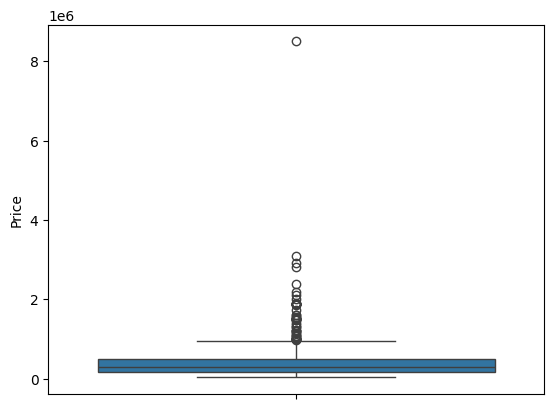

In [ ]:

sns.boxplot(df["Price"])

<Axes: ylabel='kms_driven'>

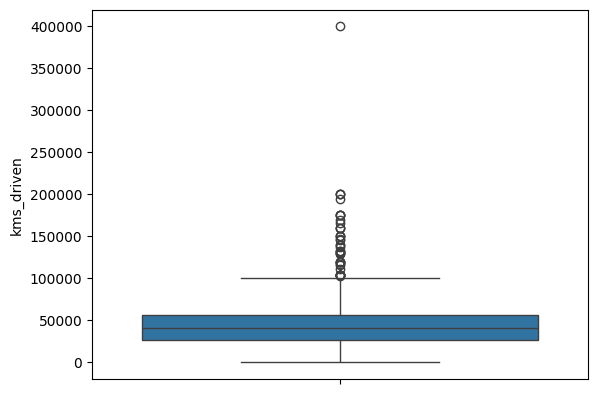

In [ ]:

sns.boxplot(df["kms_driven"])

<Axes: ylabel='year'>

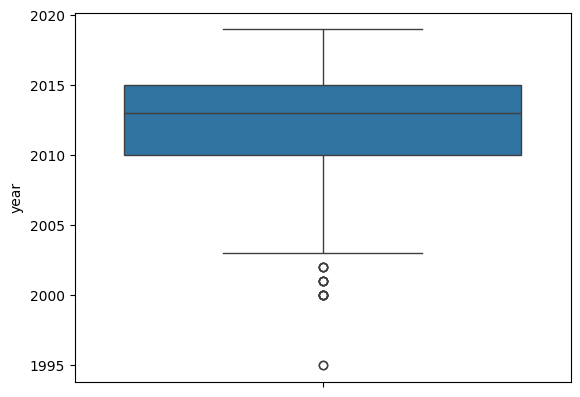

In [ ]:

sns.boxplot(df["year"])

# ***`4- DATA VISULAIZATION`***

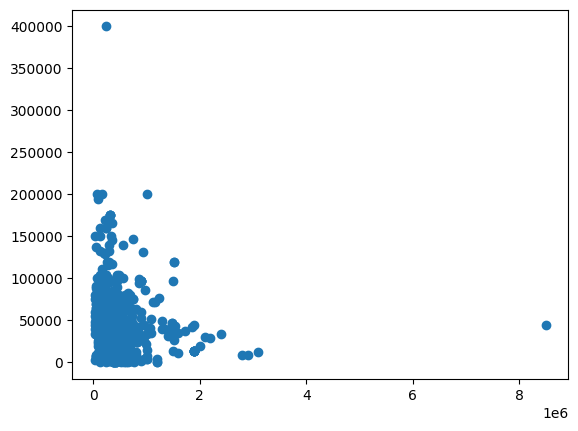

In [ ]:
plt.scatter(df["Price"],df['kms_driven'])
plt.show()

<Axes: xlabel='year', ylabel='Count'>

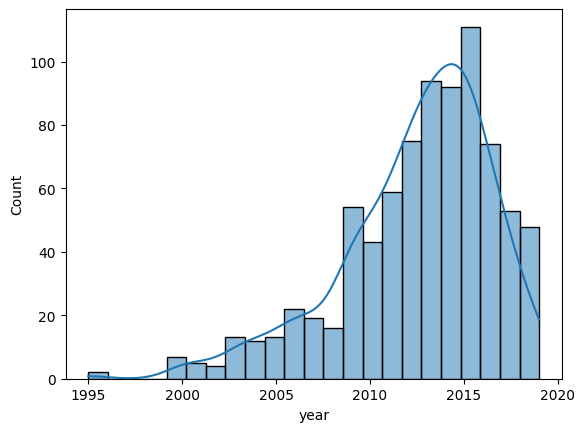

In [ ]:
sns.histplot(df["year"],kde=True)

In [ ]:
df["year"].skew()

-1.003423021587688

In [ ]:
#df["year"] = np.log1p(df["year"])

In [ ]:
#sns.histplot(df["year"],kde=True)

In [ ]:
#df["year"].skew()

<Axes: ylabel='Density'>

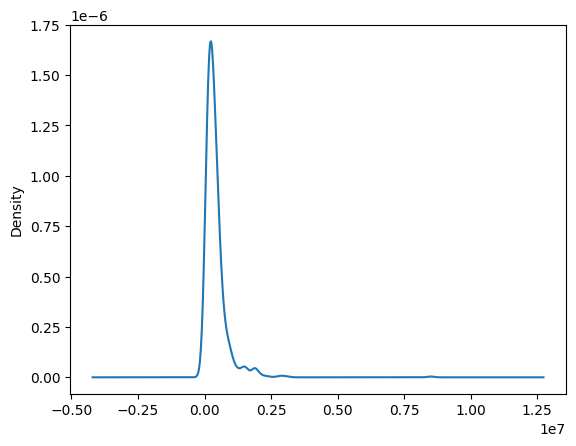

In [ ]:
df["Price"].plot(kind="kde")

<Axes: ylabel='Density'>

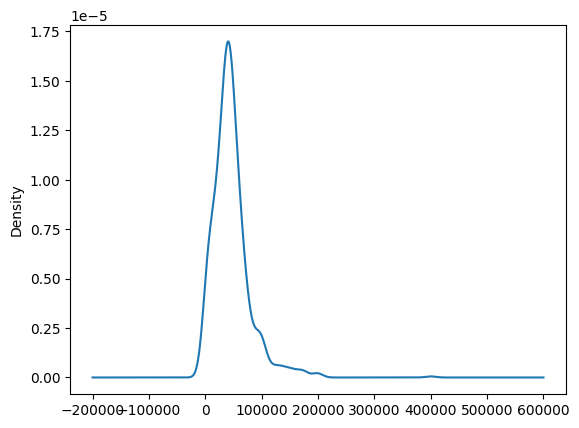

In [ ]:
df["kms_driven"].plot(kind="kde")

<Axes: xlabel='Price', ylabel='Count'>

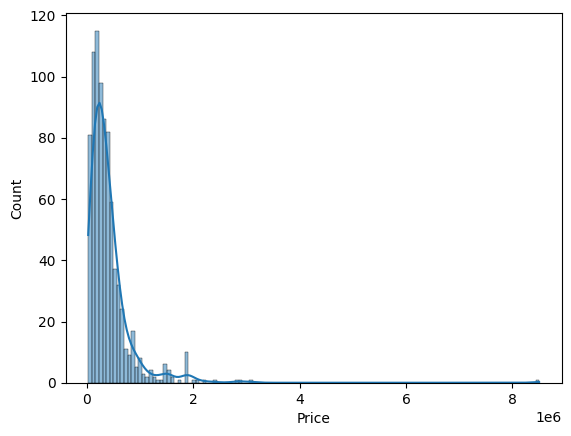

In [ ]:

sns.histplot(df["Price"],kde=True)

In [ ]:
df["Price"] = np.log1p(df["Price"])

<ipython-input-33-16cfd91b0c0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price"] = np.log1p(df["Price"])


<Axes: xlabel='Price', ylabel='Count'>

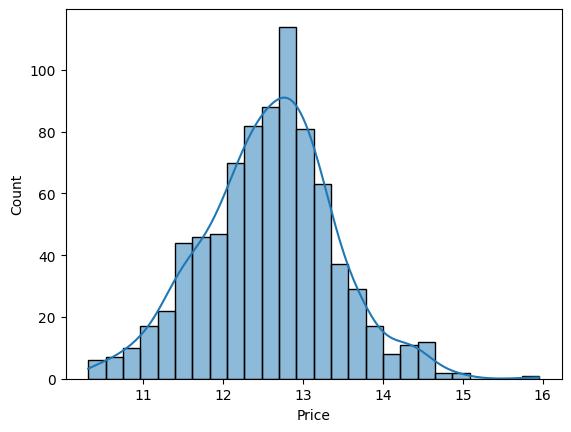

In [ ]:

sns.histplot(df["Price"],kde=True)

In [ ]:
df["kms_driven"].unique()

array([ 45000,     40,  28000,  36000,  41000,  25000,  24530,  60000,
        30000,  32000,  48660,   4000,  16934,  43000,  35550,  39522,
        39000,  55000,  72000,  15975,  70000,  23452,  35522,  48508,
        15487,  82000,  20000,  68000,  38000,  27000,  33000,  46000,
        16000,  47000,  35000,  30874,  15000,  29685, 130000,  19000,
        54000,  13000,  38200,  22000,  50000,  13500,   3600,  45863,
        60500,  12500,  18000,  13349,  29000,  44000,  42000,  14000,
        49000,  36200,  51000, 104000,  33333,  33600,   5600,   7500,
        24330,  65480, 200000,  59000,  99000,   2800,  21000,  11000,
        66000,   3000,   7000,  38500,  37200,  43200,  24800,  45872,
        40000,  11400,  97200,  52000,  31000, 175430,  37000,  65000,
         3350,  75000,  62000,  73000,   2200,  54870,  34580,  97000,
           60,  80200,   3200,      0,   5000,    588,  71200, 175400,
         9300,  56758,  10000,  56450,  56000,  32700,   9000,     73,
      

<Axes: xlabel='kms_driven', ylabel='Count'>

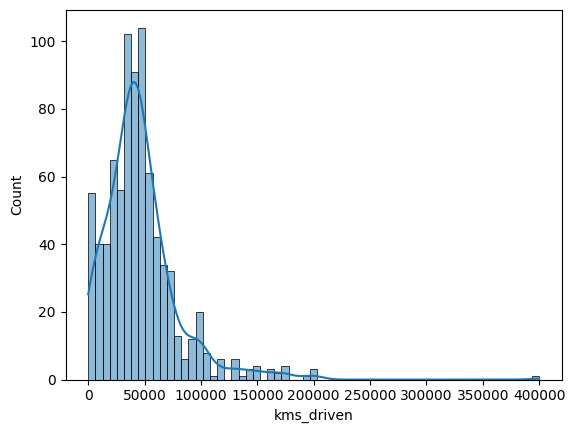

In [ ]:

sns.histplot(df["kms_driven"],kde=True)

In [ ]:
df["kms_driven"].skew()

2.6549581996425684

In [ ]:
#df["kms_driven"] = np.log1p(df["kms_driven"])

In [ ]:

#sns.histplot(df["kms_driven"],kde=True)

<Axes: ylabel='count'>

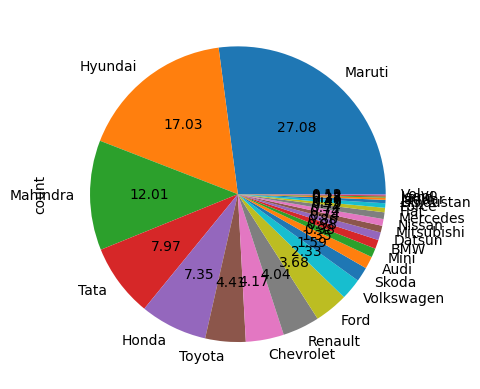

In [ ]:
df["company"].value_counts().plot(kind="pie",autopct="%.2f")

# ***`5- OUTLIERS`***

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

numerical_cols = ['Price', 'year', 'kms_driven']

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# The 'df' dataframe now contains data with outliers removed for the specified columns.

<Axes: ylabel='Price'>

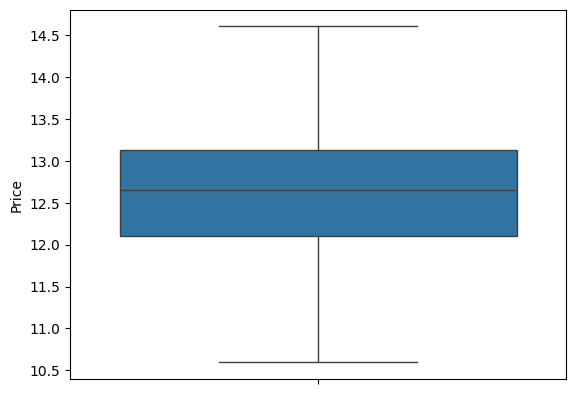

In [ ]:
sns.boxplot(df["Price"])

<Axes: ylabel='year'>

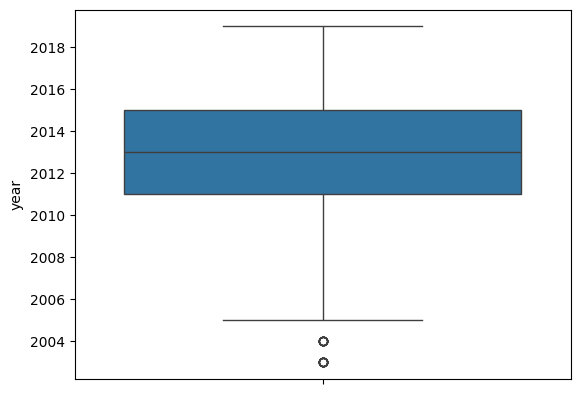

In [ ]:
sns.boxplot(df["year"])

<Axes: ylabel='kms_driven'>

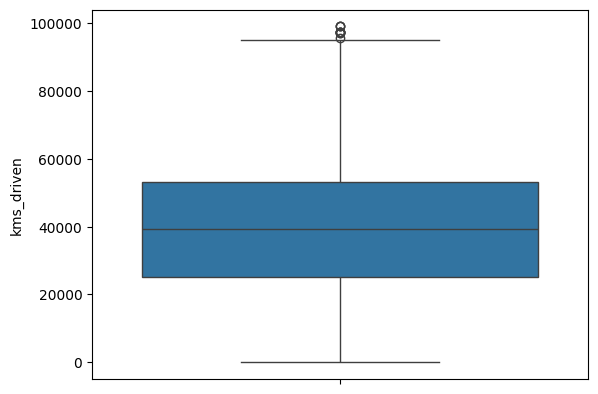

In [ ]:
sns.boxplot(df["kms_driven"])

# ***`6- FEATURE ENGINEERING`***

In [ ]:

df["year"].unique()

array([2007, 2006, 2014, 2012, 2013, 2016, 2015, 2010, 2017, 2008, 2018,
       2011, 2019, 2009, 2005, 2003, 2004], dtype=int32)

In [ ]:
df["car_age"]=2024-df['year']
dfa=df.copy()
dfa=dfa.drop('year',axis=1)
print(dfa)

                                       name   company      Price  kms_driven  \
0      Hyundai Santro Xing XO eRLX Euro III   Hyundai  11.289794       45000   
1                   Mahindra Jeep CL550 MDI  Mahindra  12.959847          40   
3    Hyundai Grand i10 Magna 1.2 Kappa VTVT   Hyundai  12.691584       28000   
4          Ford EcoSport Titanium 1.5L TDCi      Ford  13.262127       36000   
6                                 Ford Figo      Ford  12.072547       41000   
..                                      ...       ...        ...         ...   
881                             Skoda Fabia     Skoda  11.608245       45000   
883              Maruti Suzuki Ritz VXI ABS    Maruti  12.506181       50000   
885               Tata Indica V2 DLE BS III      Tata  11.608245       30000   
888                     Tata Zest XM Diesel      Tata  12.468441       27000   
889                      Mahindra Quanto C8  Mahindra  12.873905       40000   

    fuel_type  car_age  
0      Petrol 

Text(0, 0.5, 'car_age')

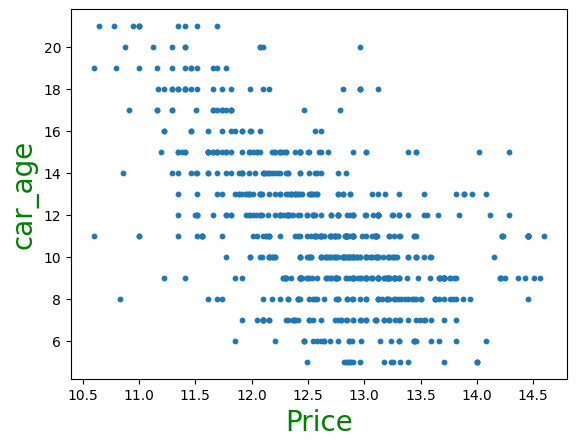

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Price'],df['car_age'],s=10)
plt.xlabel('Price',color='green',size=20)
plt.ylabel('car_age',color='green',size=20)

([<matplotlib.patches.Wedge at 0x7d927a686bf0>,
 [Text(-0.13508614539094688, 1.0916738218549606, ''),
  Text(0.1304502349020421, -1.0922374907564756, ''),
  Text(1.0999900861291056, -0.004670162490001576, '')],
 [Text(-0.07368335203142555, 0.5954584482845239, '53.92'),
  Text(0.07115467358293205, -0.5957659040489867, '45.95'),
  Text(0.5999945924340575, -0.0025473613581826773, '0.14')])

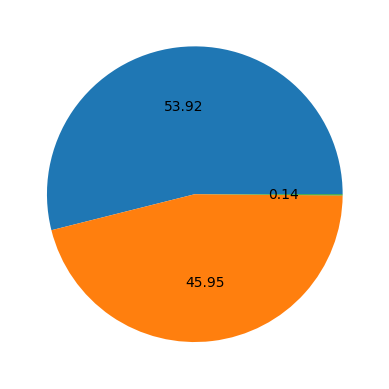

In [ ]:

plt.pie(df['fuel_type'].value_counts(),autopct="%.2f")

# ***`7- CORELATION ANALYSIS`***

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df["name"]=le.fit_transform(df["name"])
print(df)

     name   company  year      Price  kms_driven fuel_type  car_age
0     131   Hyundai  2007  11.289794       45000    Petrol       17
1     173  Mahindra  2006  12.959847          40    Diesel       18
3     120   Hyundai  2014  12.691584       28000    Petrol       10
4      47      Ford  2014  13.262127       36000    Diesel       10
6      53      Ford  2012  12.072547       41000    Diesel       12
..    ...       ...   ...        ...         ...       ...      ...
881   339     Skoda  2009  11.608245       45000    Petrol       15
883   259    Maruti  2011  12.506181       50000    Petrol       13
885   352      Tata  2009  11.608245       30000    Diesel       15
888   384      Tata  2018  12.468441       27000    Diesel        6
889   181  Mahindra  2013  12.873905       40000    Diesel       11

[740 rows x 7 columns]


In [ ]:
df["company"]=le.fit_transform(df["company"])
print(df)

     name  company  year      Price  kms_driven fuel_type  car_age
0     131        8  2007  11.289794       45000    Petrol       17
1     173       12  2006  12.959847          40    Diesel       18
3     120        8  2014  12.691584       28000    Petrol       10
4      47        6  2014  13.262127       36000    Diesel       10
6      53        6  2012  12.072547       41000    Diesel       12
..    ...      ...   ...        ...         ...       ...      ...
881   339       19  2009  11.608245       45000    Petrol       15
883   259       13  2011  12.506181       50000    Petrol       13
885   352       20  2009  11.608245       30000    Diesel       15
888   384       20  2018  12.468441       27000    Diesel        6
889   181       12  2013  12.873905       40000    Diesel       11

[740 rows x 7 columns]


In [ ]:
df["fuel_type"]=le.fit_transform(df["fuel_type"])
print(df)

     name  company  year      Price  kms_driven  fuel_type  car_age
0     131        8  2007  11.289794       45000          2       17
1     173       12  2006  12.959847          40          0       18
3     120        8  2014  12.691584       28000          2       10
4      47        6  2014  13.262127       36000          0       10
6      53        6  2012  12.072547       41000          0       12
..    ...      ...   ...        ...         ...        ...      ...
881   339       19  2009  11.608245       45000          2       15
883   259       13  2011  12.506181       50000          2       13
885   352       20  2009  11.608245       30000          0       15
888   384       20  2018  12.468441       27000          0        6
889   181       12  2013  12.873905       40000          0       11

[740 rows x 7 columns]


In [ ]:
df

,name,company,year,Price,kms_driven,fuel_type,car_age
0,131,8,2007,11.289794,45000,2,17
1,173,12,2006,12.959847,40,0,18
3,120,8,2014,12.691584,28000,2,10
4,47,6,2014,13.262127,36000,0,10
6,53,6,2012,12.072547,41000,0,12
...,...,...,...,...,...,...,...
881,339,19,2009,11.608245,45000,2,15
883,259,13,2011,12.506181,50000,2,13
885,352,20,2009,11.608245,30000,0,15
888,384,20,2018,12.468441,27000,0,6


In [ ]:
corr_matrix=df[["Price","car_age","kms_driven","fuel_type","company",]].corr()
corr_matrix

,Price,car_age,kms_driven,fuel_type,company
Price,1.000000,-0.562825,-0.199183,-0.324754,-0.007128
car_age,-0.562825,1.000000,0.380501,0.134817,0.000425
kms_driven,-0.199183,0.380501,1.000000,-0.264524,0.093824
fuel_type,-0.324754,0.134817,-0.264524,1.000000,-0.151718
company,-0.007128,0.000425,0.093824,-0.151718,1.000000


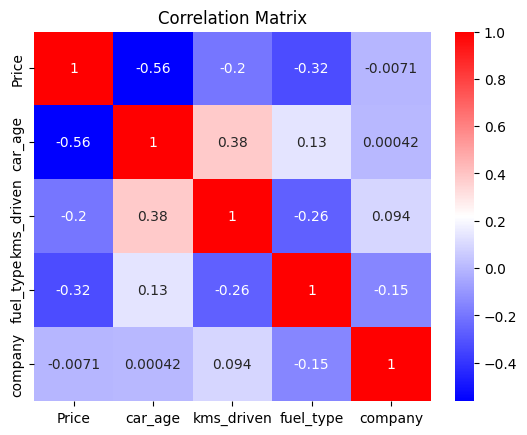

In [ ]:
sns.heatmap(corr_matrix,annot=True, cmap='bwr',)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
corr_matrix=df.corr()
corr_matrix

,name,company,year,Price,kms_driven,fuel_type,car_age
name,1.000000,0.968074,-0.051318,-0.030782,0.093745,-0.111131,0.051318
company,0.968074,1.000000,-0.000425,-0.007128,0.093824,-0.151718,0.000425
year,-0.051318,-0.000425,1.000000,0.562825,-0.380501,-0.134817,-1.000000
Price,-0.030782,-0.007128,0.562825,1.000000,-0.199183,-0.324754,-0.562825
kms_driven,0.093745,0.093824,-0.380501,-0.199183,1.000000,-0.264524,0.380501
fuel_type,-0.111131,-0.151718,-0.134817,-0.324754,-0.264524,1.000000,0.134817
car_age,0.051318,0.000425,-1.000000,-0.562825,0.380501,0.134817,1.000000


In [ ]:
# corr_matrix=df[["Price","car_age","kms_driven","fuel_type","company","name"]].corr()
# corr_matrix

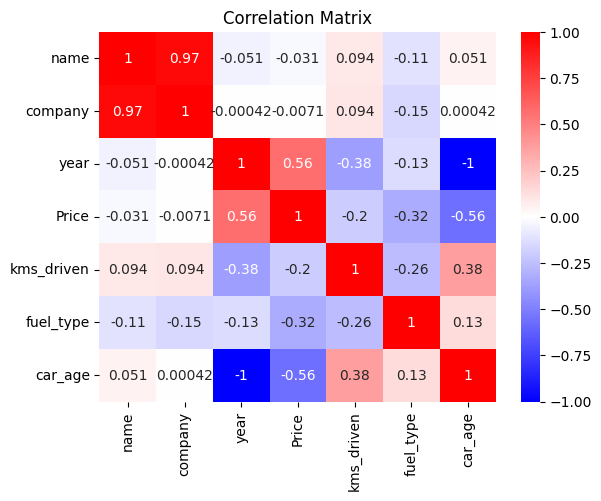

In [ ]:
sns.heatmap(corr_matrix,annot=True,cmap="bwr")
plt.title('Correlation Matrix')
plt.show()

# ***`8- PCA`***

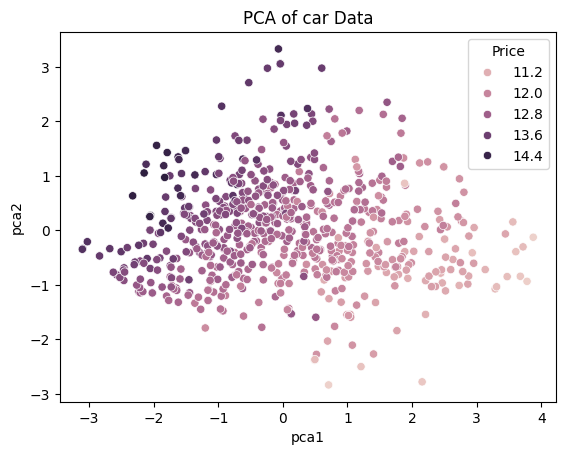

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features before PCA
features = ['Price', 'kms_driven', 'car_age']
X = StandardScaler().fit_transform(df[features])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Add PCA results to the DataFrame
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

# Visualize PCA results
sns.scatterplot(x='pca1', y='pca2', hue='Price', data=df)
plt.title('PCA of car Data')
plt.show()

In [ ]:
df

,name,company,year,Price,kms_driven,fuel_type,car_age,pca1,pca2
0,131,8,2007,11.289794,45000,2,17,2.209222,-0.922271
1,173,12,2006,12.959847,40,0,18,0.127420,-1.533365
3,120,8,2014,12.691584,28000,2,10,-0.553225,-0.353332
4,47,6,2014,13.262127,36000,0,10,-0.824784,0.350427
6,53,6,2012,12.072547,41000,0,12,0.581545,-0.353555
...,...,...,...,...,...,...,...,...,...
881,339,19,2009,11.608245,45000,2,15,1.588466,-0.629418
883,259,13,2011,12.506181,50000,2,13,0.624549,0.257782
885,352,20,2009,11.608245,30000,0,15,1.265244,-1.207468
888,384,20,2018,12.468441,27000,0,6,-1.147078,-0.402291


# ***`9- DATASCALING`***

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Standardization (mean = 0, std = 1)
scaler = StandardScaler()
df[['year_scaled', 'kms_driven_scaled']] = scaler.fit_transform(df[['year', 'kms_driven']])
print(df[['year_scaled', 'kms_driven_scaled']] )

# Normalization (scaling to 0-1 range)
minmax_scaler = MinMaxScaler()
df[['year_normalized', 'kms_driven_normalized']] = minmax_scaler.fit_transform(df[['year', 'kms_driven']])
print(df[['year_normalized', 'kms_driven_normalized']] )

     year_scaled  kms_driven_scaled
0      -1.626498           0.240382
1      -1.911174          -1.821453
3       0.366231          -0.539227
4       0.366231          -0.172352
6      -0.203120           0.056945
..           ...                ...
881    -1.057147           0.240382
883    -0.487796           0.469679
885    -1.057147          -0.447508
888     1.504934          -0.585086
889     0.081556           0.011085

[740 rows x 2 columns]
     year_normalized  kms_driven_normalized
0             0.2500               0.454545
1             0.1875               0.000404
3             0.6875               0.282828
4             0.6875               0.363636
6             0.5625               0.414141
..               ...                    ...
881           0.3750               0.454545
883           0.5000               0.505051
885           0.3750               0.303030
888           0.9375               0.272727
889           0.6250               0.404040

[740 rows x 2 c

# ***`10- MODELING`***


In [ ]:
x=df.drop(columns="Price")
y=df["Price"]

In [ ]:
x

,name,company,year,kms_driven,fuel_type,car_age,pca1,pca2,year_scaled,kms_driven_scaled,year_normalized,kms_driven_normalized
0,131,8,2007,45000,2,17,2.209222,-0.922271,-1.626498,0.240382,0.2500,0.454545
1,173,12,2006,40,0,18,0.127420,-1.533365,-1.911174,-1.821453,0.1875,0.000404
3,120,8,2014,28000,2,10,-0.553225,-0.353332,0.366231,-0.539227,0.6875,0.282828
4,47,6,2014,36000,0,10,-0.824784,0.350427,0.366231,-0.172352,0.6875,0.363636
6,53,6,2012,41000,0,12,0.581545,-0.353555,-0.203120,0.056945,0.5625,0.414141
...,...,...,...,...,...,...,...,...,...,...,...,...
881,339,19,2009,45000,2,15,1.588466,-0.629418,-1.057147,0.240382,0.3750,0.454545
883,259,13,2011,50000,2,13,0.624549,0.257782,-0.487796,0.469679,0.5000,0.505051
885,352,20,2009,30000,0,15,1.265244,-1.207468,-1.057147,-0.447508,0.3750,0.303030
888,384,20,2018,27000,0,6,-1.147078,-0.402291,1.504934,-0.585086,0.9375,0.272727


In [ ]:
y

,Price
0,11.289794
1,12.959847
3,12.691584
4,13.262127
6,12.072547
...,...
881,11.608245
883,12.506181
885,11.608245
888,12.468441


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(592, 12)
(148, 12)
(592,)
(148,)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




In [ ]:
# Regression algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor  # Multi-layer perceptron regressor (MLP)

In [ ]:
# Standardize the dataset (only for some algorithms like SVR and Neural network-which gives better results )
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# List of linear regression models to apply
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)
}

In [ ]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

In [ ]:
# Dictionary to store the results
results = {}

In [ ]:
# Apply each model and compute metrics
for name, model in models.items(): # When you call items() on a dictionary, returns a list of the dictionary’s key-value tuple pairs.
                                   # Here "name" represents the "key", and "model" represents the "value"
  if name in ["Support Vector Regressor", "Neural Network"]: # Standardised value is only applied to support vector regressor and Neural network
        # Apply scaling for models that need it
        model.fit(x_train_scaled, y_train)
        y_pred = model.predict(x_test_scaled)
  else:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        # Compute evaluation metrics
  mae, mse, r2 = evaluate_model(y_test, y_pred)
  results[name] = {"MAE": mae, "MSE": mse, "R²": r2} # name represents the "key" of the dictionary. Here key is the name of the algorithms
  # In the new dictionary "results", the key is the name of the algorithm; and the "key" is the MAE, RMSE,and R2 values
  # results[name] will be the different key when the name of the algorithm changes

In [ ]:

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                                   MAE           MSE        R²
Linear Regression         2.624927e-14  8.982994e-28  1.000000
Ridge Regression          1.781278e-03  5.262209e-06  0.999989
Lasso Regression          4.930202e-01  3.862621e-01  0.223165
ElasticNet Regression     4.325378e-01  3.011394e-01  0.394360
Decision Tree             1.486005e-01  5.332896e-02  0.892747
Random Forest             1.084128e-01  2.833615e-02  0.943011
Gradient Boosting         9.917533e-02  2.203472e-02  0.955685
Support Vector Regressor  7.058704e-02  1.711289e-02  0.965583
K-Nearest Neighbors       5.408791e-01  4.832408e-01  0.028125
Neural Network            1.640721e-01  4.329440e-02  0.912928


In [ ]:
# Apply each model and compute metrics
for name, model in models.items(): # When you call items() on a dictionary, returns a list of the dictionary’s key-value tuple pairs.
                                   # Here "name" represents the "key", and "model" represents the "value"
  if name in ["Support Vector Regressor", "Neural Network"]: # Standardised value is only applied to support vector regressor and Neural network
        # Apply scaling for models that need it
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
  else:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        # Compute evaluation metrics
  mae, mse, r2 = evaluate_model(y_test, y_pred)
  results[name] = {"MAE": mae, "MSE": mse, "R²": r2} # name represents the "key" of the dictionary. Here key is the name of the algorithms
  # In the new dictionary "results", the key is the name of the algorithm; and the "key" is the MAE, RMSE,and R2 values
  # results[name] will be the different key when the name of the algorithm changes



# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                                   MAE           MSE        R²
Linear Regression         2.624927e-14  8.982994e-28  1.000000
Ridge Regression          1.781278e-03  5.262209e-06  0.999989
Lasso Regression          4.930202e-01  3.862621e-01  0.223165
ElasticNet Regression     4.325378e-01  3.011394e-01  0.394360
Decision Tree             1.533769e-01  5.969542e-02  0.879943
Random Forest             1.085974e-01  2.887709e-02  0.941924
Gradient Boosting         9.890939e-02  2.186524e-02  0.956025
Support Vector Regressor  5.275316e-01  4.477935e-01  0.099415
K-Nearest Neighbors       5.408791e-01  4.832408e-01  0.028125
Neural Network            1.022007e+00  2.602210e+00 -4.233464


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming models is a dictionary of model names and their corresponding model objects
# Assuming x_train, y_train, x_test, y_test are already defined

scaler = StandardScaler()  # Initialize the scaler

results = {}  # Dictionary to store the evaluation results

for name, model in models.items():
    # Apply scaling for models that need it
    if name in ["Support Vector Regressor", "Neural Network"]:
        # Standardize the data for models that require scaling
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)

        model.fit(x_train_scaled, y_train)
        y_pred = model.predict(x_test_scaled)
    else:
        # For models that don't require scaling (e.g., trees, random forests)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

    # Compute evaluation metrics
    mae, mse, r2 = evaluate_model(y_test, y_pred)

    # Round metrics to 3 decimal places
    mae = round(mae, 3)
    mse = round(mse, 3)
    r2 = round(r2, 3)

    # Store the metrics in the results dictionary
    results[name] = {"MAE": mae, "MSE": mse, "R²": r2}

# Convert the results dictionary to a DataFrame for better visualization
results_df = pd.DataFrame(results).T

# Display the results
print(results_df)


                            MAE    MSE     R²
Linear Regression         0.000  0.000  1.000
Ridge Regression          0.002  0.000  1.000
Lasso Regression          0.493  0.386  0.223
ElasticNet Regression     0.433  0.301  0.394
Decision Tree             0.150  0.059  0.881
Random Forest             0.109  0.030  0.940
Gradient Boosting         0.099  0.022  0.957
Support Vector Regressor  0.071  0.017  0.966
K-Nearest Neighbors       0.541  0.483  0.028
Neural Network            0.166  0.044  0.912


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming models is a dictionary of model names and their corresponding model objects
# Assuming x_train, y_train, x_test, y_test are already defined

scaler = StandardScaler()  # Initialize the scaler

results = {}  # Dictionary to store the evaluation results

for name, model in models.items():
    # Apply scaling for models that need it
    if name in ["Support Vector Regressor", "Neural Network"]:
        # Standardize the data for models that require scaling
        x_train = scaler.fit_transform(x_train)
        x_test = scaler.transform(x_test)

        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
    else:
        # For models that don't require scaling (e.g., trees, random forests)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

    # Compute evaluation metrics
    mae, mse, r2 = evaluate_model(y_test, y_pred)

    # Round metrics to 3 decimal places
    mae = round(mae, 3)
    mse = round(mse, 3)
    r2 = round(r2, 3)

    # Store the metrics in the results dictionary
    results[name] = {"MAE": mae, "MSE": mse, "R²": r2}

# Convert the results dictionary to a DataFrame for better visualization
results_df = pd.DataFrame(results).T

# Display the results
print(results_df)


                            MAE    MSE     R²
Linear Regression         0.000  0.000  1.000
Ridge Regression          0.002  0.000  1.000
Lasso Regression          0.493  0.386  0.223
ElasticNet Regression     0.433  0.301  0.394
Decision Tree             0.146  0.054  0.892
Random Forest             0.108  0.029  0.942
Gradient Boosting         0.099  0.022  0.957
Support Vector Regressor  0.071  0.017  0.966
K-Nearest Neighbors       0.259  0.131  0.737
Neural Network            0.184  0.066  0.867


In [ ]:
gb= GradientBoostingRegressor()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
print(r2_score(y_test,y_pred))

0.9557889286003691


# ***`11- DOCUMENTATION AND REPORTING`***

In [ ]:
summary = {
    'Dataset Shape': df.shape,
    'Missing Values': df.isnull().sum().sum(),
    'Correlation with Survival': df.corr()['Price'].sort_values(ascending=False)
}
print("EDA Summary:")
for key, value in summary.items():
    print(f"{key}: {value}")
# Prepare final dataset for modeling

final_df = df[['year', 'kms_driven', 'car_age', 'Price']]

EDA Summary:
Dataset Shape: (740, 13)
Missing Values: 0
Correlation with Survival: Price                    1.000000
year                     0.562825
year_normalized          0.562825
year_scaled              0.562825
pca2                     0.476620
company                 -0.007128
name                    -0.030782
kms_driven_normalized   -0.199183
kms_driven              -0.199183
kms_driven_scaled       -0.199183
fuel_type               -0.324754
car_age                 -0.562825
pca1                    -0.789699
Name: Price, dtype: float64


# ***`REPORTING DATA SET`***

***Used Car Price Prediction Project Explanation
This project focuses on predicting the price of used cars based on various features such as car name, company, fuel type, kilometers driven, year of manufacture, and other attributes. The goal is to build and evaluate multiple machine learning models to predict the price of a car, given these features.

Project Breakdown:
1. Dataset Description:
The dataset contains several columns that describe the features of the used cars:

Company: Name of the company manufacturing the car.
Car Name: Model name of the car.
Fuel Type: The type of fuel the car uses (e.g., Petrol, Diesel, Electric).
Kilometers Driven: The total number of kilometers the car has been driven.
Year: The year in which the car was manufactured.
Price: The target variable we are trying to predict, representing the price of the car in INR.
The target variable is Price, and the features include company, car name, fuel type, kilometers driven, and year.

2. Project Steps:
Step 1: Data Collection and Loading
The dataset is loaded from a CSV file (quikr_car - quikr_car.csv) using Pandas.
Preview the Data: We display the first few rows of the dataset and check for the shape (number of rows and columns).
Data Types & Missing Values: We check the data types of each column and check for any missing values.
- Step 2: Data Cleaning
Handling Duplicates: We remove any duplicate records to ensure the dataset is clean.
Handling Missing Values: Missing data is handled by dropping rows with missing values.
Data Type Conversions:
Columns like kms_driven (which includes commas and "kms" text) are cleaned to numerical values.
The Price column is cleaned by removing commas and converting it to an integer.
The year column is converted to an integer.
Outliers Removal: Using Interquartile Range (IQR), outliers in features like Price, year, and kms_driven are removed.
- Step 3: Exploratory Data Analysis (EDA)
Data Visualization:
Histograms and boxplots are plotted for the continuous variables to understand their distributions.
Scatterplots show relationships between variables (e.g., Price vs kms_driven).
The correlation matrix is plotted using a heatmap to identify relationships between features and the target variable (Price).
Skewness: We check the skewness of continuous features like Price and kms_driven. In case of high skewness, we apply log transformation to normalize the distribution.
- Step 4: Feature Engineering
Car Age Calculation: We create a new feature, car_age, calculated as the difference between the current year (2024) and the car's year of manufacture.
Label Encoding: Categorical features such as company and fuel_type are encoded using LabelEncoder to convert them into numerical values suitable for machine learning models.
- Step 5: Dimensionality Reduction
Principal Component Analysis (PCA): PCA is applied to reduce the number of dimensions (features) while retaining as much information as possible. This helps with improving model performance in some cases and makes it easier to visualize high-dimensional data.
- Step 6: Feature Scaling
Standardization: We standardize continuous features like year and kms_driven using StandardScaler. This is especially important for models like Support Vector Machines (SVM) and Neural Networks, which are sensitive to the scale of input features.
- Step 7: Model Building
Several regression models are applied to predict the Price of the car:

Linear Regression: A basic linear model to predict price.
Ridge & Lasso Regression: Variants of linear regression that apply regularization (Ridge: L2 regularization, Lasso: L1 regularization) to prevent overfitting.
ElasticNet: Combines L1 and L2 regularization from Lasso and Ridge.
Decision Tree Regressor: A non-linear model that splits the data based on feature values to predict the target.
Random Forest Regressor: An ensemble method that uses multiple decision trees to improve accuracy.
Gradient Boosting Regressor: A powerful ensemble method that builds trees sequentially to correct the errors of previous trees.
Support Vector Regressor (SVR): A model based on the support vector machine algorithm, used for regression tasks.
K-Nearest Neighbors (KNN): A model that predicts price based on the average price of the nearest neighbors in the feature space.
Neural Network (MLPRegressor): A multi-layer perceptron neural network model, used for capturing complex relationships in the data.
- Step 8: Model Evaluation
For each model, the following evaluation metrics are computed:

Mean Absolute Error (MAE): Measures the average absolute difference between predicted and actual values. Lower values are better.
Mean Squared Error (MSE): Similar to MAE, but it squares the differences. It penalizes large errors more than MAE.
R-Squared (R²): Indicates how well the model fits the data. The closer the value is to 1, the better the model.
The evaluation metrics are rounded to 3 decimal places for easy interpretation.

- Step 9: Results Visualization
The results of the models' performance are presented in a DataFrame, where each row represents a model and columns show the MAE, MSE, and R².
A bar plot can be generated to visually compare the performance of all models, allowing us to see which model performs the best based on these metrics.
- Final Report:
At the end of the project, we generate a report summarizing:

Exploratory Data Analysis: Insights about the features and their distributions.
Model Performance: A comparison of all the models based on evaluation metrics (MAE, MSE, R²).
Best Model: Identification of the best-performing model based on the evaluation metrics.
- Conclusions and Recommendations: Based on the results, we can suggest which model should be used for predicting the prices of used cars and how the model can be further improved.
- Potential Improvements:
Hyperparameter Tuning: Fine-tuning model parameters using grid search or random search can improve the model performance.
Feature Engineering: Exploring additional features (e.g., car mileage, engine capacity) could improve the prediction accuracy.
Ensemble Methods: Combining multiple models using techniques like stacking or boosting could lead to better predictions.
***